<a href="https://colab.research.google.com/github/jiiiisoo/deeplearning_yonsei/blob/main/JisooKim_code_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow.keras import Sequential,models,layers
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

import cv2

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip -uq "/content/drive/MyDrive/deeplearning/final_project/bicycle_helmet.zip" -d "/content/drive/MyDrive/deeplearning/final_project"

In [11]:
width = 512
height = 512
datagen = ImageDataGenerator(rescale=1/255.0, validation_split=0.2, horizontal_flip=True, width_shift_range=0.1, brightness_range=(0,0.4))

In [12]:
trainDatagen = datagen.flow_from_directory(directory='/content/drive/MyDrive/deeplearning/bicycle_helmet',
                                           target_size=(width,height),
                                           class_mode = 'binary',
                                           batch_size =3 ,
                                           subset='training')

valDatagen = datagen.flow_from_directory(directory='/content/drive/MyDrive/deeplearning/bicycle_helmet',
                                           target_size=(width,height),
                                           class_mode = 'binary',
                                           batch_size =3 ,
                                           subset='validation')

Found 195 images belonging to 2 classes.
Found 48 images belonging to 2 classes.


In [13]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(512,512,3),data_format='channels_last', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 512, 512, 32)      896       
                                                                 
 batch_normalization_8 (Batc  (None, 512, 512, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 256, 256, 32)     0         
 2D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 256, 256, 32)      0         
                                                                 
 conv2d_9 (Conv2D)           (None, 256, 256, 64)      18496     
                                                                 
 batch_normalization_9 (Batc  (None, 256, 256, 64)    

In [14]:
# model fit
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), optimizer='adam', metrics=['accuracy'])

# Fitting the neural network to the training set
history_1 = model.fit(trainDatagen, epochs=10, validation_data=(valDatagen))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


65/65 [==============================] - 56s 851ms/step - loss: 44.9505 - accuracy: 0.5436 - val_loss: 14.0638 - val_accuracy: 0.4792
Epoch 2/10
65/65 [==============================] - 58s 892ms/step - loss: 67.5085 - accuracy: 0.6205 - val_loss: 187.8998 - val_accuracy: 0.4792
Epoch 3/10
65/65 [==============================] - 59s 918ms/step - loss: 70.7517 - accuracy: 0.5538 - val_loss: 55.3751 - val_accuracy: 0.4792
Epoch 4/10
65/65 [==============================] - 58s 891ms/step - loss: 52.1896 - accuracy: 0.5538 - val_loss: 106.1856 - val_accuracy: 0.4792
Epoch 5/10
65/65 [==============================] - 53s 817ms/step - loss: 60.0016 - accuracy: 0.5487 - val_loss: 9.4350 - val_accuracy: 0.5833
Epoch 6/10
65/65 [==============================] - 53s 816ms/step - loss: 59.2958 - accuracy: 0.5846 - val_loss: 5.8302 - val_accuracy: 0.6458
Epoch 7/10
65/65 [==============================] - 53s 814ms/step - loss: 34.0659 - accuracy: 0.5641 - val_loss: 21.6560 - val_accuracy: 0.5

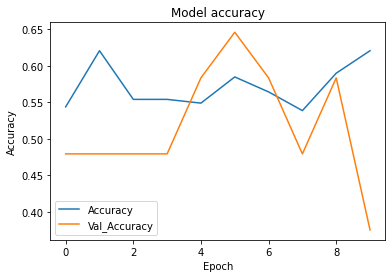

In [15]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Accuracy', 'Val_Accuracy'])

In [16]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(512,512,3),data_format='channels_last',))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 510, 510, 32)      896       
                                                                 
 batch_normalization_12 (Bat  (None, 510, 510, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 255, 255, 32)     0         
 g2D)                                                            
                                                                 
 dropout_18 (Dropout)        (None, 255, 255, 32)      0         
                                                                 
 conv2d_13 (Conv2D)          (None, 255, 255, 64)      18496     
                                                                 
 batch_normalization_13 (Bat  (None, 255, 255, 64)    

In [17]:
# model fit
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), optimizer='adam', metrics=['accuracy'])

# Fitting the neural network to the training set
history_2 = model.fit(trainDatagen, epochs=10, validation_data=(valDatagen))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


65/65 [==============================] - 53s 814ms/step - loss: 229.6019 - accuracy: 0.5641 - val_loss: 110.8398 - val_accuracy: 0.5208
Epoch 2/10
65/65 [==============================] - 53s 810ms/step - loss: 247.0334 - accuracy: 0.6359 - val_loss: 136.9788 - val_accuracy: 0.5208
Epoch 3/10
65/65 [==============================] - 52s 794ms/step - loss: 194.3022 - accuracy: 0.6051 - val_loss: 142.9397 - val_accuracy: 0.4792
Epoch 4/10
65/65 [==============================] - 52s 793ms/step - loss: 168.3512 - accuracy: 0.6256 - val_loss: 85.5518 - val_accuracy: 0.5625
Epoch 5/10
65/65 [==============================] - 53s 818ms/step - loss: 84.5774 - accuracy: 0.5949 - val_loss: 190.1098 - val_accuracy: 0.4792
Epoch 6/10
65/65 [==============================] - 52s 802ms/step - loss: 83.6569 - accuracy: 0.6462 - val_loss: 20.4224 - val_accuracy: 0.6875
Epoch 7/10
65/65 [==============================] - 52s 799ms/step - loss: 54.9991 - accuracy: 0.7333 - val_loss: 73.3775 - val_accur

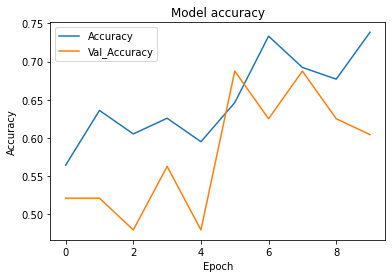

In [18]:
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Accuracy', 'Val_Accuracy'])

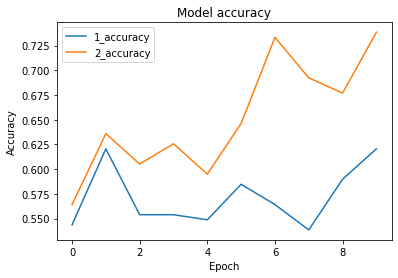

In [19]:
#7 layer와 4 layer 비교
plt.plot(history_1.history['accuracy'])
plt.plot(history_2.history['accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['1_accuracy', '2_accuracy'])

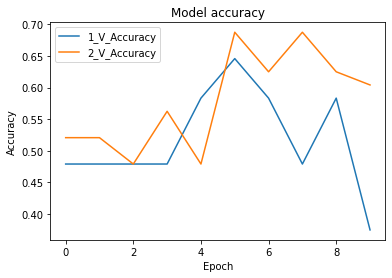

In [20]:
plt.plot(history_1.history['val_accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['1_V_Accuracy', '2_V_Accuracy'])

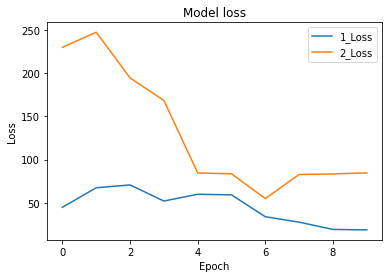

In [21]:
plt.plot(history_1.history['loss'])
plt.plot(history_2.history['loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['1_Loss', '2_Loss'])

In [22]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(512,512,3),data_format='channels_last',))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 510, 510, 32)      896       
                                                                 
 batch_normalization_14 (Bat  (None, 510, 510, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 255, 255, 32)     0         
 g2D)                                                            
                                                                 
 dropout_21 (Dropout)        (None, 255, 255, 32)      0         
                                                                 
 conv2d_15 (Conv2D)          (None, 255, 255, 64)      18496     
                                                                 
 batch_normalization_15 (Bat  (None, 255, 255, 64)    

In [23]:
# model fit
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), optimizer='adam', metrics=['accuracy'])

# Fitting the neural network to the training set
history_3 = model.fit(trainDatagen, epochs=20, validation_data=(valDatagen))

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


65/65 [==============================] - 53s 821ms/step - loss: 189.4156 - accuracy: 0.5077 - val_loss: 19.8455 - val_accuracy: 0.5208
Epoch 2/20
65/65 [==============================] - 52s 802ms/step - loss: 182.7907 - accuracy: 0.5641 - val_loss: 21.4677 - val_accuracy: 0.4792
Epoch 3/20
65/65 [==============================] - 52s 800ms/step - loss: 124.0772 - accuracy: 0.6308 - val_loss: 73.9617 - val_accuracy: 0.5417
Epoch 4/20
65/65 [==============================] - 52s 795ms/step - loss: 133.5746 - accuracy: 0.5949 - val_loss: 46.8305 - val_accuracy: 0.6042
Epoch 5/20
65/65 [==============================] - 52s 791ms/step - loss: 105.4972 - accuracy: 0.6205 - val_loss: 81.3486 - val_accuracy: 0.5208
Epoch 6/20
65/65 [==============================] - 53s 799ms/step - loss: 83.8168 - accuracy: 0.7026 - val_loss: 193.5746 - val_accuracy: 0.4792
Epoch 7/20
65/65 [==============================] - 52s 801ms/step - loss: 68.4859 - accuracy: 0.7026 - val_loss: 118.7807 - val_accura

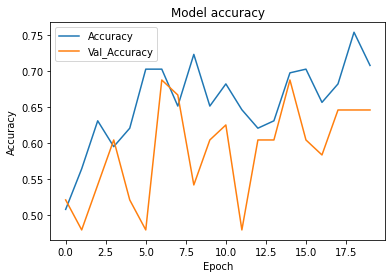

In [24]:
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Accuracy', 'Val_Accuracy'])

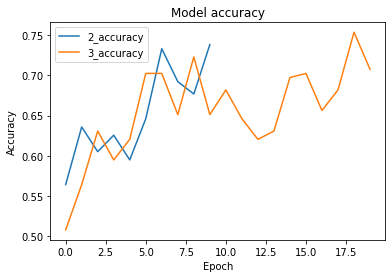

In [25]:
#4 layer에서 epoch 10일 때와 epoch 20일 때 비교
plt.plot(history_2.history['accuracy'])
plt.plot(history_3.history['accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['2_accuracy', '3_accuracy'])

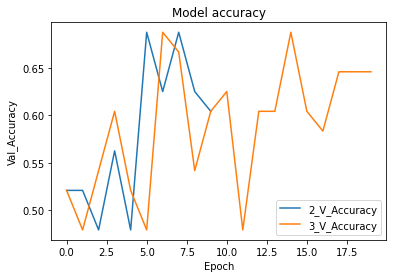

In [26]:
plt.plot(history_2.history['val_accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Val_Accuracy')
plt.legend(['2_V_Accuracy', '3_V_Accuracy'])

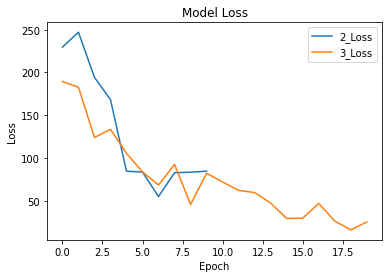

In [27]:
plt.plot(history_2.history['loss'])
plt.plot(history_3.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['2_Loss', '3_Loss'])

In [28]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(512,512,3),data_format='channels_last', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 512, 512, 32)      896       
                                                                 
 batch_normalization_16 (Bat  (None, 512, 512, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 256, 256, 32)     0         
 g2D)                                                            
                                                                 
 dropout_24 (Dropout)        (None, 256, 256, 32)      0         
                                                                 
 conv2d_17 (Conv2D)          (None, 256, 256, 64)      18496     
                                                                 
 batch_normalization_17 (Bat  (None, 256, 256, 64)    

In [29]:
# model fit
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), optimizer='adam', metrics=['accuracy'])

# Fitting the neural network to the training set
history_4 = model.fit(trainDatagen, epochs=20, validation_data=(valDatagen))

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


65/65 [==============================] - 54s 825ms/step - loss: 50.9784 - accuracy: 0.5692 - val_loss: 98.1030 - val_accuracy: 0.5208
Epoch 2/20
65/65 [==============================] - 52s 811ms/step - loss: 81.4921 - accuracy: 0.5949 - val_loss: 163.6888 - val_accuracy: 0.4792
Epoch 3/20
65/65 [==============================] - 53s 812ms/step - loss: 64.8124 - accuracy: 0.6718 - val_loss: 41.5152 - val_accuracy: 0.4792
Epoch 4/20
65/65 [==============================] - 52s 803ms/step - loss: 59.4457 - accuracy: 0.5744 - val_loss: 127.2215 - val_accuracy: 0.4792
Epoch 5/20
65/65 [==============================] - 52s 805ms/step - loss: 45.5917 - accuracy: 0.6205 - val_loss: 20.0523 - val_accuracy: 0.5625
Epoch 6/20
65/65 [==============================] - 52s 796ms/step - loss: 42.9735 - accuracy: 0.6000 - val_loss: 42.2448 - val_accuracy: 0.4792
Epoch 7/20
65/65 [==============================] - 52s 802ms/step - loss: 49.2494 - accuracy: 0.6308 - val_loss: 67.3694 - val_accuracy: 0

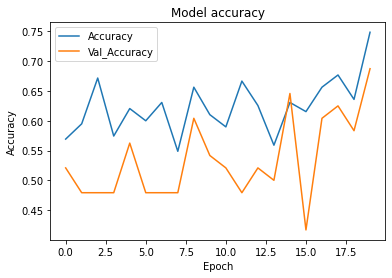

In [30]:
plt.plot(history_4.history['accuracy'])
plt.plot(history_4.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Accuracy', 'Val_Accuracy'])

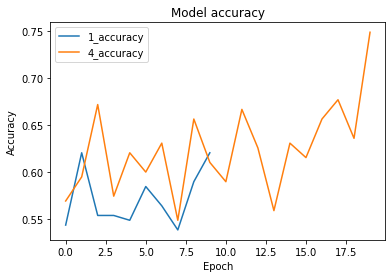

In [31]:
#7 layer에서 epoch 10일 때와 epoch 20일 때 비교
plt.plot(history_1.history['accuracy'])
plt.plot(history_4.history['accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['1_accuracy', '4_accuracy'])

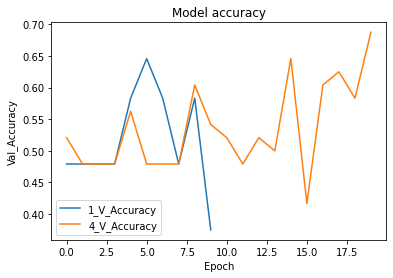

In [32]:
plt.plot(history_1.history['val_accuracy'])
plt.plot(history_4.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Val_Accuracy')
plt.legend(['1_V_Accuracy', '4_V_Accuracy'])

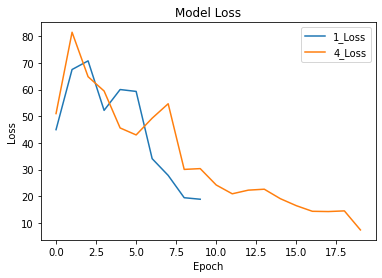

In [33]:
plt.plot(history_1.history['loss'])
plt.plot(history_4.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['1_Loss', '4_Loss'])

In [40]:
trainDatagen = datagen.flow_from_directory(directory='/content/drive/MyDrive/deeplearning/bicycle_helmet',
                                           target_size=(width,height),
                                           class_mode = 'binary',
                                           batch_size = 16,
                                           subset='training')

valDatagen = datagen.flow_from_directory(directory='/content/drive/MyDrive/deeplearning/bicycle_helmet',
                                           target_size=(width,height),
                                           class_mode = 'binary',
                                           batch_size = 16,
                                           subset='validation')

Found 195 images belonging to 2 classes.
Found 48 images belonging to 2 classes.


In [41]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(512,512,3),data_format='channels_last',))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))


In [42]:
# model fit
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), optimizer='adam', metrics=['accuracy'])

# Fitting the neural network to the training set
history_5 = model.fit(trainDatagen, epochs=10, validation_data=(valDatagen))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


13/13 [==============================] - 62s 4s/step - loss: 32.7447 - accuracy: 0.5128 - val_loss: 2.4420 - val_accuracy: 0.5208
Epoch 2/10
13/13 [==============================] - 55s 4s/step - loss: 47.3454 - accuracy: 0.5436 - val_loss: 1.1817 - val_accuracy: 0.5625
Epoch 3/10
13/13 [==============================] - 55s 4s/step - loss: 38.5234 - accuracy: 0.5641 - val_loss: 29.9286 - val_accuracy: 0.4792
Epoch 4/10
13/13 [==============================] - 58s 4s/step - loss: 39.8385 - accuracy: 0.5590 - val_loss: 35.4657 - val_accuracy: 0.4792
Epoch 5/10
13/13 [==============================] - 54s 4s/step - loss: 30.9086 - accuracy: 0.5590 - val_loss: 17.4811 - val_accuracy: 0.4792
Epoch 6/10
13/13 [==============================] - 53s 4s/step - loss: 28.4165 - accuracy: 0.5128 - val_loss: 26.1039 - val_accuracy: 0.4792
Epoch 7/10
13/13 [==============================] - 52s 4s/step - loss: 22.8588 - accuracy: 0.5487 - val_loss: 68.6868 - val_accuracy: 0.4792
Epoch 8/10
13/13 [=

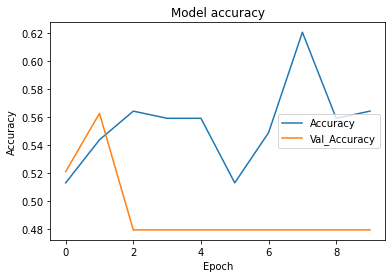

In [43]:
plt.plot(history_5.history['accuracy'])
plt.plot(history_5.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Accuracy', 'Val_Accuracy'], loc='center right')

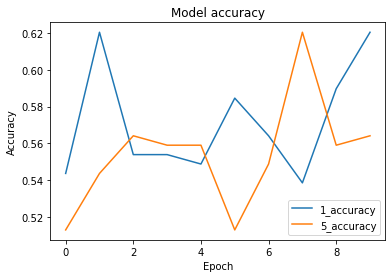

In [47]:
#7 layer에서 batchsize 3일 때와 16일 때 비교
plt.plot(history_1.history['accuracy'])
plt.plot(history_5.history['accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['1_accuracy', '5_accuracy'])

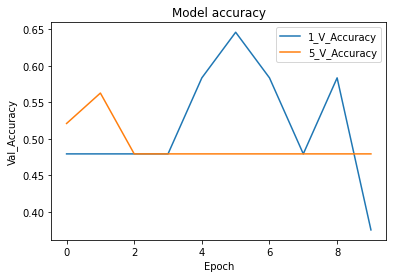

In [48]:
plt.plot(history_1.history['val_accuracy'])
plt.plot(history_5.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Val_Accuracy')
plt.legend(['1_V_Accuracy', '5_V_Accuracy'])

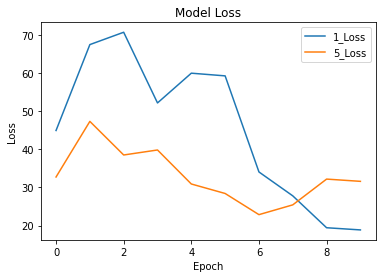

In [49]:
plt.plot(history_1.history['loss'])
plt.plot(history_5.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['1_Loss', '5_Loss'])

In [44]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(512,512,3),data_format='channels_last',))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 510, 510, 32)      896       
                                                                 
 batch_normalization_24 (Bat  (None, 510, 510, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 255, 255, 32)     0         
 g2D)                                                            
                                                                 
 dropout_36 (Dropout)        (None, 255, 255, 32)      0         
                                                                 
 conv2d_25 (Conv2D)          (None, 255, 255, 64)      18496     
                                                                 
 batch_normalization_25 (Bat  (None, 255, 255, 64)    

In [45]:
# model fit
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), optimizer='adam', metrics=['accuracy'])

#dense 수 줄이고 실행
# Fitting the neural network to the training set
history_6 = model.fit(trainDatagen, epochs=10, validation_data=(valDatagen))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


13/13 [==============================] - 54s 4s/step - loss: 103.7163 - accuracy: 0.5179 - val_loss: 24.1955 - val_accuracy: 0.5208
Epoch 2/10
13/13 [==============================] - 51s 4s/step - loss: 82.7444 - accuracy: 0.5538 - val_loss: 61.6183 - val_accuracy: 0.5208
Epoch 3/10
13/13 [==============================] - 51s 4s/step - loss: 68.5212 - accuracy: 0.6410 - val_loss: 61.6108 - val_accuracy: 0.5208
Epoch 4/10
13/13 [==============================] - 51s 4s/step - loss: 79.4062 - accuracy: 0.6718 - val_loss: 57.8378 - val_accuracy: 0.5208
Epoch 5/10
13/13 [==============================] - 51s 4s/step - loss: 68.5297 - accuracy: 0.7026 - val_loss: 58.5146 - val_accuracy: 0.5208
Epoch 6/10
13/13 [==============================] - 52s 4s/step - loss: 38.8096 - accuracy: 0.7231 - val_loss: 85.4351 - val_accuracy: 0.5208
Epoch 7/10
13/13 [==============================] - 51s 4s/step - loss: 42.8526 - accuracy: 0.7282 - val_loss: 99.2456 - val_accuracy: 0.5208
Epoch 8/10
13/13

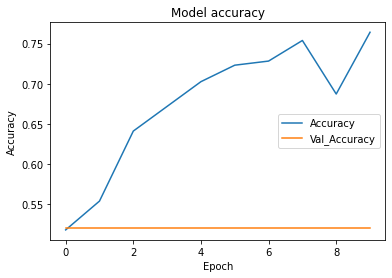

In [46]:
plt.plot(history_6.history['accuracy'])
plt.plot(history_6.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Accuracy', 'Val_Accuracy'], loc='center right')

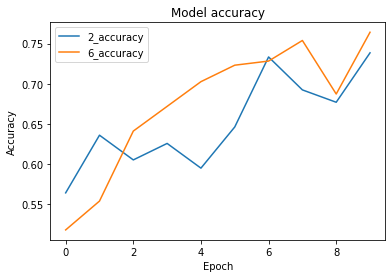

In [50]:
# 4 layer에서 batchsize 3 일 때와 16일 때 비교
plt.plot(history_2.history['accuracy'])
plt.plot(history_6.history['accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['2_accuracy', '6_accuracy'])

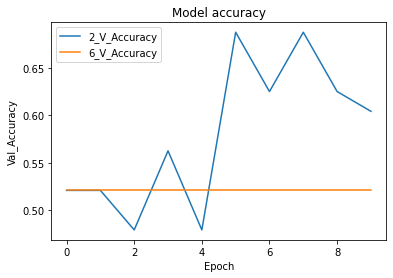

In [51]:
plt.plot(history_2.history['val_accuracy'])
plt.plot(history_6.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Val_Accuracy')
plt.legend(['2_V_Accuracy', '6_V_Accuracy'])

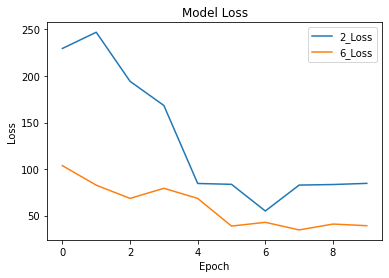

In [52]:
plt.plot(history_2.history['loss'])
plt.plot(history_6.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['2_Loss', '6_Loss'])

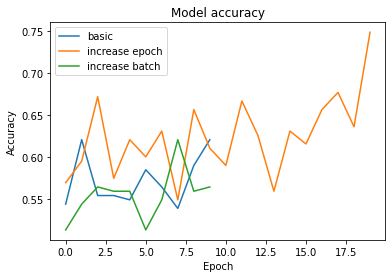

In [53]:
#layer 7에서 전체 비교
plt.plot(history_1.history['accuracy'])
plt.plot(history_4.history['accuracy'])
plt.plot(history_5.history['accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['basic','increase epoch', 'increase batch'])

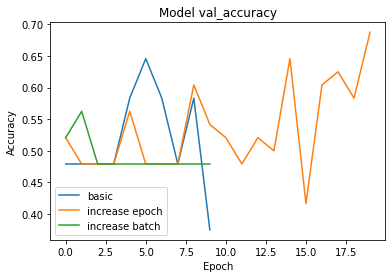

In [54]:
plt.plot(history_1.history['val_accuracy'])
plt.plot(history_4.history['val_accuracy'])
plt.plot(history_5.history['val_accuracy'])
plt.title('Model val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['basic','increase epoch', 'increase batch'])

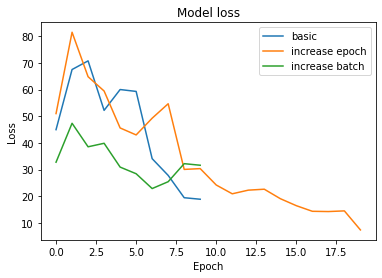

In [55]:
plt.plot(history_1.history['loss'])
plt.plot(history_4.history['loss'])
plt.plot(history_5.history['loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['basic','increase epoch', 'increase batch'])

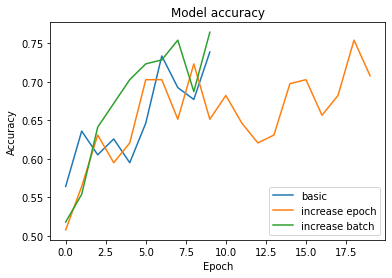

In [56]:
#layer 4에서 전체 비교
plt.plot(history_2.history['accuracy'])
plt.plot(history_3.history['accuracy'])
plt.plot(history_6.history['accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['basic','increase epoch', 'increase batch'])

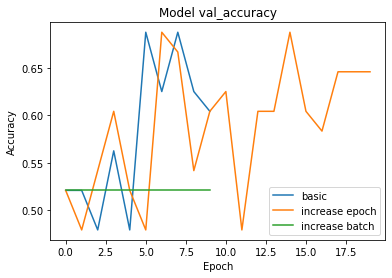

In [57]:
plt.plot(history_2.history['val_accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.plot(history_6.history['val_accuracy'])
plt.title('Model val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['basic','increase epoch', 'increase batch'])

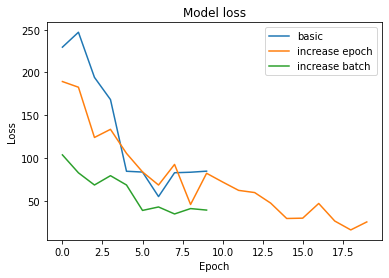

In [58]:
plt.plot(history_2.history['loss'])
plt.plot(history_3.history['loss'])
plt.plot(history_6.history['loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['basic','increase epoch', 'increase batch'])